In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv("./melbourne_house_overfitting.csv")
df.head()

,Rooms,Propertycount,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Price,Suburb_Aberfeldie,...,CouncilArea_Moorabool Shire Council,CouncilArea_Moreland City Council,CouncilArea_Nillumbik Shire Council,CouncilArea_Port Phillip City Council,CouncilArea_Stonnington City Council,CouncilArea_Whitehorse City Council,CouncilArea_Whittlesea City Council,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council
0,2,4019.0,2.5,2.0,1.0,1.0,202.0,160.2564,1480000.0,0,...,0,0,0,0,0,0,0,0,1,0
1,2,4019.0,2.5,2.0,1.0,0.0,156.0,79.0000,1035000.0,0,...,0,0,0,0,0,0,0,0,1,0
2,3,4019.0,2.5,3.0,2.0,0.0,134.0,150.0000,1465000.0,0,...,0,0,0,0,0,0,0,0,1,0
3,3,4019.0,2.5,3.0,2.0,1.0,94.0,160.2564,850000.0,0,...,0,0,0,0,0,0,0,0,1,0
4,4,4019.0,2.5,3.0,1.0,2.0,120.0,142.0000,1600000.0,0,...,0,0,0,0,0,0,0,0,1,0


In [7]:
df.shape

(27244, 745)

In [4]:
df.info

<bound method DataFrame.info of        Rooms  Propertycount  Distance  Bedroom2  Bathroom  Car    Landsize  \
0          2         4019.0       2.5       2.0       1.0  1.0  202.000000   
1          2         4019.0       2.5       2.0       1.0  0.0  156.000000   
2          3         4019.0       2.5       3.0       2.0  0.0  134.000000   
3          3         4019.0       2.5       3.0       2.0  1.0   94.000000   
4          4         4019.0       2.5       3.0       1.0  2.0  120.000000   
...      ...            ...       ...       ...       ...  ...         ...   
27239      4         6543.0       6.3       4.0       1.0  3.0  593.000000   
27240      2         6543.0       6.3       2.0       2.0  1.0   98.000000   
27241      2         6543.0       6.3       2.0       1.0  2.0  220.000000   
27242      3         6543.0       6.3       0.0       0.0  0.0  593.598993   
27243      2         6543.0       6.3       2.0       1.0  0.0  250.000000   

       BuildingArea      Price 

In [5]:
df.describe

<bound method NDFrame.describe of        Rooms  Propertycount  Distance  Bedroom2  Bathroom  Car    Landsize  \
0          2         4019.0       2.5       2.0       1.0  1.0  202.000000   
1          2         4019.0       2.5       2.0       1.0  0.0  156.000000   
2          3         4019.0       2.5       3.0       2.0  0.0  134.000000   
3          3         4019.0       2.5       3.0       2.0  1.0   94.000000   
4          4         4019.0       2.5       3.0       1.0  2.0  120.000000   
...      ...            ...       ...       ...       ...  ...         ...   
27239      4         6543.0       6.3       4.0       1.0  3.0  593.000000   
27240      2         6543.0       6.3       2.0       2.0  1.0   98.000000   
27241      2         6543.0       6.3       2.0       1.0  2.0  220.000000   
27242      3         6543.0       6.3       0.0       0.0  0.0  593.598993   
27243      2         6543.0       6.3       2.0       1.0  0.0  250.000000   

       BuildingArea      Pric

In [8]:
df.isnull().sum()

Rooms                                     0
Propertycount                             0
Distance                                  0
Bedroom2                                  0
Bathroom                                  0
                                         ..
CouncilArea_Whitehorse City Council       0
CouncilArea_Whittlesea City Council       0
CouncilArea_Wyndham City Council          0
CouncilArea_Yarra City Council            0
CouncilArea_Yarra Ranges Shire Council    0
Length: 745, dtype: int64

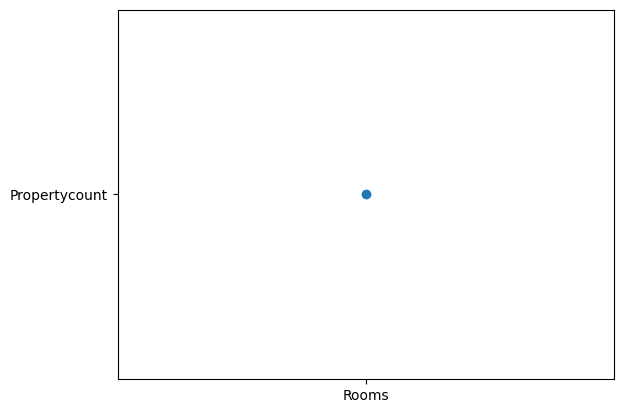

In [9]:
plt.scatter(x="Rooms", y="Propertycount")